# CSE445.1 Final Assignment Notebook

**Name**: Ferdous Zeaul Islam  
**ID**: 173 1136 042  

**Course**: CSE445 (Machine Learning)  
**Faculty**: Dr. Sifat Momen (Sfm1)  
**Section**: 01  
**Semester**: Spring 2021 

In [1]:
# only need this line in jupyter
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## (a) Read the dataset using panda's dataframe.

In [2]:
hearts_df = pd.read_csv('./heart.csv')
hearts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## (b) Find out the number of instances and the number of features (including the target class) in the dataset.

In [3]:
hearts_df.shape

(303, 14)

There are 303 instances and total 14 features (including the target class).

## (c) Show the first five rows of the dataset

In [4]:
hearts_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## (d) Print the number of missing entries (i.e. the number of null values) per feature. If there exists any missing entries, replace the value with that particular feature's mean.

In [5]:
# courtesy- <https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/>
hearts_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There exists no missing(null) values.

## (e) Print the number of unique values per feature. If the number of unique values for any feature is less than 10, print those unique feature values.

In [6]:
for column in hearts_df.columns:
    column_distinctValue_cnt = hearts_df[column].value_counts()
    print(column,'has', len(column_distinctValue_cnt),'distinct values')
    if len(column_distinctValue_cnt) < 10:
        print(column_distinctValue_cnt)
    print()

age has 41 distinct values

sex has 2 distinct values
1    207
0     96
Name: sex, dtype: int64

cp has 4 distinct values
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

trestbps has 49 distinct values

chol has 152 distinct values

fbs has 2 distinct values
0    258
1     45
Name: fbs, dtype: int64

restecg has 3 distinct values
1    152
0    147
2      4
Name: restecg, dtype: int64

thalach has 91 distinct values

exang has 2 distinct values
0    204
1     99
Name: exang, dtype: int64

oldpeak has 40 distinct values

slope has 3 distinct values
2    142
1    140
0     21
Name: slope, dtype: int64

ca has 5 distinct values
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

thal has 4 distinct values
2    166
3    117
1     18
0      2
Name: thal, dtype: int64

target has 2 distinct values
1    165
0    138
Name: target, dtype: int64



## (f) Generate a boxplot that shows the gender-wise age distribution. Show the boxplot for target = 0 as well as target = 1.

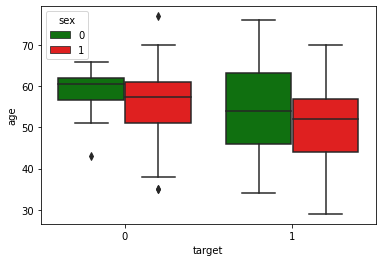

In [7]:
sns.boxplot(x = 'target', y = 'age', data = hearts_df, hue = 'sex', palette = ['green', 'red'])

plt.show()

## (g) Now, generate a boxplot that shows the chestpain-wise age distribution. Show the boxplot for target = 0 as well as target = 1

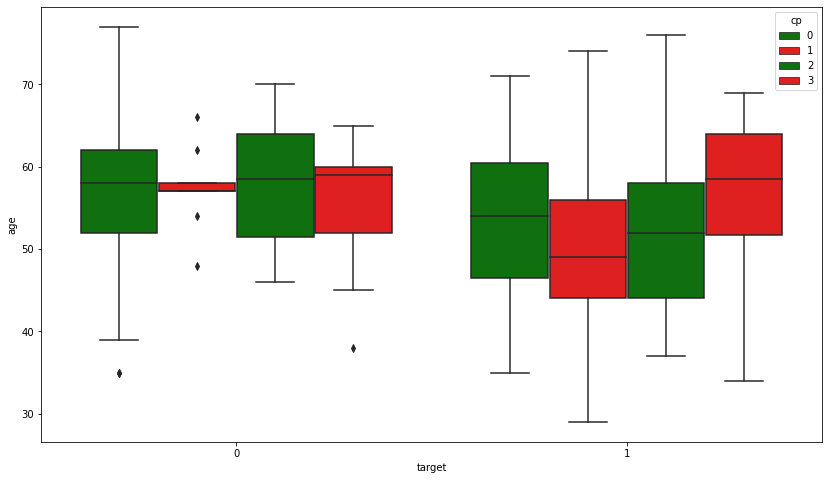

In [8]:

'''
chage plot size
courtesy- <https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot>
''' 
fig, ax = plt.subplots(figsize=(14,8))

sns.boxplot(ax = ax, x = 'target', y = 'age', data = hearts_df, hue = 'cp', palette = ['green', 'red'])
plt.show()

## (h) Generate lmplot to show how cholestoral varies with age. Draw separate lmplots for different gender.

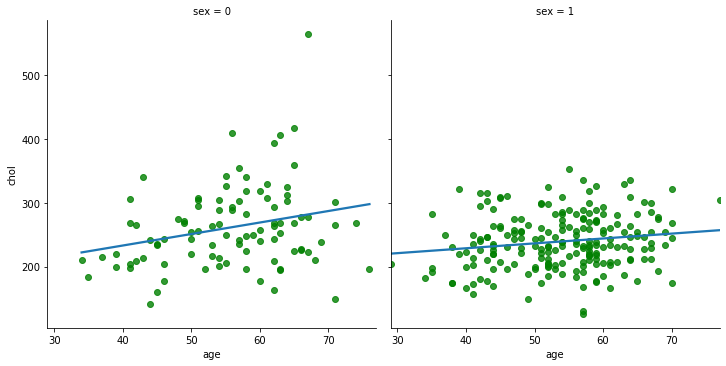

In [9]:
sns.lmplot(x = 'age', y = 'chol', data = hearts_df, col = 'sex', scatter_kws = {'color':'green'}, ci = False)
plt.show()

## (i) Generate a heatmap showing correlation between all features.

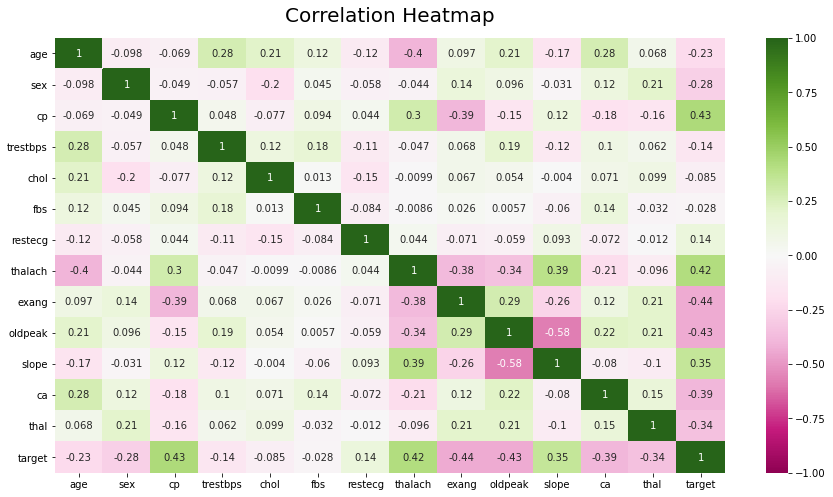

In [10]:
# help taken from -> 
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(15, 8))

corr_matrix = hearts_df.corr()

heatmap = sns.heatmap(
            
    # correlation matrix
    corr_matrix,
    
    # two-contrast color, different color for + -
    cmap="PiYG",
    
    # color map range
    vmin=-1, vmax=1,
    
    # show corr values in the cells
    annot=True
)

# set a title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

plt.show()

## (j) Scale all the features between 0 and 1

In [11]:
hearts_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
hearts_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hearts_df_scaled = pd.DataFrame(scaler.fit_transform(hearts_df), columns=hearts_df.columns)

In [14]:
hearts_df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [15]:
hearts_df_scaled.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0
302,0.583333,0.0,0.333333,0.339623,0.251142,0.0,0.0,0.786260,0.0,0.000000,0.5,0.25,0.666667,0.0


## (k) You are going to predict the “target”. Use 10 fold cross-validation to predict the target. Use the classifiers ZeroR, KNN, SVM, logistic regression and Decision Tree and for each of them, report the accuracy, precision, recall, roc area and f1 score along with the standard deviation of each of them.

In [16]:
X = hearts_df_scaled.drop(columns=['target'])
y = hearts_df['target'] # intentionally taken from unscaled df

In [17]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 10-fold cross validation
cv = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) 

'''
applies 10 fold cross validation to the passed model 
returns list of accuracy, recall, precision, f1 score, AUC of the kfold cross validation
'''
def apply_kfold(model):
    accuracies = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    recalls = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1)
    precisions = cross_val_score(model, X, y, scoring = 'precision', cv = cv, n_jobs = -1)
    f1s = cross_val_score(model, X, y, scoring = 'f1', cv = cv, n_jobs = -1)
    aucs = cross_val_score(model, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)
    
    return accuracies, recalls, precisions, f1s, aucs

In [20]:
'''
prints mean and standard deviation  
of passed list of accuracy, recall, precision, f1 score, AUC
'''
def show_evaluation_metrics(kfold_accuracies, kfold_precisions, kfold_recalls, kfold_f1s, kfold_aucs):
    print('Accuracy = ', round(np.mean(kfold_accuracies), 3), '( std =',round(np.std(kfold_accuracies), 3),')')
    print('Precision = ', round(np.mean(kfold_precisions), 3), '( std =',round(np.std(kfold_precisions), 3),')')
    print('Recall = ', round(np.mean(kfold_recalls), 3), '( std =',round(np.std(kfold_recalls), 3),')')
    print('f1-score = ', round(np.mean(kfold_f1s), 3), '( std =',round(np.std(kfold_f1s), 3),')')
    print('AUC = ', round(np.mean(kfold_aucs), 3), '( std =',round(np.std(kfold_aucs), 3),')')

  
  ## Applying ZeroR

In [21]:
from sklearn.dummy import DummyClassifier

# ZeroR classifier
zeroR_model = DummyClassifier(strategy = 'most_frequent', random_state = 42)

zeroR_accuracies, zeroR_precisions, zeroR_recalls, zeroR_f1s, zeroR_aucs = apply_kfold(zeroR_model)

In [22]:
show_evaluation_metrics(zeroR_accuracies, zeroR_precisions, zeroR_recalls, zeroR_f1s, zeroR_aucs)

Accuracy =  0.545 ( std = 0.013 )
Precision =  1.0 ( std = 0.0 )
Recall =  0.545 ( std = 0.013 )
f1-score =  0.705 ( std = 0.011 )
AUC =  0.5 ( std = 0.0 )


## Applying KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#### Finding the best(highest accuracy) hyper-parameter values using GridSearchCV

Testing for n_neighbors from 1 to 50 and p value 1 to 10.

In [24]:
'''
courtesy-
    <https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a>
    <https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee>
'''  
from sklearn.model_selection import GridSearchCV

# create a dictionary of parameters we want to search
param_grid = {'n_neighbors': np.arange(1, 50), 'p':np.arange(1, 10)}

# use gridsearch to check all values for n_neighbors
knn_gscv_model = GridSearchCV(KNeighborsClassifier(metric='minkowski'), param_grid, scoring='accuracy', cv=cv)

# fit model to data
knn_gscv_model.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [25]:
knn_gscv_model.best_params_

{'n_neighbors': 13, 'p': 1}

  
  So, GridSearchCV found n_neighbors=13, p=1 gives best accuracy.

In [26]:
model = KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=1)
knn_accuracies, knn_precisions, knn_recalls, knn_f1s, knn_aucs = apply_kfold(model)

In [27]:
show_evaluation_metrics(knn_accuracies, knn_precisions, knn_recalls, knn_f1s, knn_aucs)

Accuracy =  0.848 ( std = 0.057 )
Precision =  0.904 ( std = 0.08 )
Recall =  0.836 ( std = 0.06 )
f1-score =  0.866 ( std = 0.052 )
AUC =  0.908 ( std = 0.047 )


## Applying Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

#### Finding the best(highest accuracy) hyper-parameter values using GridSearchCV

Testing for max_depth from 1 to 50 and criterion value 'gini' and 'entropy'

In [29]:
# create a dictionary of all parameter values we want to exhaustively search
param_grid = {'max_depth': np.arange(1, 50), 'criterion': ['gini', 'entropy']}

# use gridsearch to check all values in param_grid
decisionTree_gscv_model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=cv)

# fit model to data
decisionTree_gscv_model.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [30]:
decisionTree_gscv_model.best_params_

{'criterion': 'gini', 'max_depth': 3}

  
  So, GridSearchCV found max_depth=3, criterion='gini' gives best accuracy.

In [31]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dTree_accuracies, dTree_precisions, dTree_recalls, dTree_f1s, dTree_aucs = apply_kfold(model)

In [32]:
show_evaluation_metrics(dTree_accuracies, dTree_precisions, dTree_recalls, dTree_f1s, dTree_aucs)

Accuracy =  0.822 ( std = 0.074 )
Precision =  0.879 ( std = 0.081 )
Recall =  0.812 ( std = 0.064 )
f1-score =  0.843 ( std = 0.066 )
AUC =  0.85 ( std = 0.072 )


## Applying SVM

In [33]:
from sklearn.svm import SVC

#### Finding the best(highest accuracy) hyper-parameter values using GridSearchCV

Testing for C from integers 1 to 100 and floats [0.1, 0.2, 0.3,....,0.9] with kernel='linear' 

In [34]:
# create a dictionary of all parameter values we want to exhaustively search
C_vals = []
for i in range (1, 10):
    C_vals.append(round(i*0.1, 2))
for i in range (1, 50):
    C_vals.append(i)
    
param_grid = {'C': C_vals}

# use gridsearch to check all values in param_grid
linearSVM_gscv_model = GridSearchCV(SVC(kernel='linear'), param_grid, scoring='accuracy', cv=cv)

# fit model to data
linearSVM_gscv_model.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                               16, 17, 18, 19, 20, 21, ...]},
             scoring='accuracy')

In [35]:
linearSVM_gscv_model.best_params_

{'C': 14}

  
  So, GridSearchCV found C=14 gives best accuracy.

In [36]:
model = SVC(kernel='linear', C=14)
linearSVM_accuracies, linearSVM_precisions, linearSVM_recalls, linearSVM_f1s, linearSVM_aucs = apply_kfold(model)

In [37]:
show_evaluation_metrics(linearSVM_accuracies, linearSVM_precisions, linearSVM_recalls, linearSVM_f1s, linearSVM_aucs)

Accuracy =  0.851 ( std = 0.077 )
Precision =  0.915 ( std = 0.068 )
Recall =  0.831 ( std = 0.072 )
f1-score =  0.87 ( std = 0.065 )
AUC =  0.898 ( std = 0.064 )


## Apply Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

#### Finding the best(highest accuracy) hyper-parameter values using GridSearchCV

Testing for,  
C value: integers 1 to 100 and floats [0.1, 0.2, 0.3,..., 0.9]  
solver: ‘newton-cg’, ‘sag’, ‘lbfgs’

In [39]:
# create a dictionary of all parameter values we want to exhaustively search
param_grid = {'C': C_vals, 'solver':['newton-cg', 'sag', 'lbfgs']} # C_vals are same as linearSVM 

# use gridsearch to check all values in param_grid
logisticRegression_gscv_model = GridSearchCV(LogisticRegression(random_state=42), 
                                             param_grid, scoring='accuracy', cv=cv)

# fit model to data
logisticRegression_gscv_model.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                               16, 17, 18, 19, 20, 21, ...],
                         'solver': ['newton-cg', 'sag', 'lbfgs']},
             scoring='accuracy')

In [40]:
logisticRegression_gscv_model.best_params_

{'C': 25, 'solver': 'newton-cg'}

  
  So, GridSearchCV found C=25 and solver='newton-cg' gives best accuracy.

In [41]:
model = LogisticRegression(C=25, solver='newton-cg', random_state=42)
logisticRegression_accuracy, logisticRegression_precision, logisticRegression_recall, logisticRegression_f1, logisticRegression_auc = apply_kfold(model)

In [42]:
show_evaluation_metrics(logisticRegression_accuracy, logisticRegression_precision, 
                        logisticRegression_recall, logisticRegression_f1, logisticRegression_auc)

Accuracy =  0.838 ( std = 0.068 )
Precision =  0.903 ( std = 0.068 )
Recall =  0.82 ( std = 0.063 )
f1-score =  0.859 ( std = 0.058 )
AUC =  0.895 ( std = 0.067 )


  
  ## Performance Comparison 

|                     | Accuracy | Precision | Recall | F1-score | AUC   |
|---------------------|----------|-----------|--------|----------|-------|
| ZeroR               | 0.545    | 1         | 0.545  | 0.705    | 0.5   |
| KNN                | 0.848    | 0.904     | **0.836**  | 0.866    | **0.908** |
| Decision Tree       | 0.822    | 0.879     | 0.812  | 0.843    | 0.85  |
| **<u>Linear SVM</u>**          | **0.851**    | **0.915**     | 0.831  | **0.87**     | 0.898 |
| Logistic Regression | 0.838    | 0.903     | 0.82   | 0.859    | 0.895 |